# Proyecto 1
El Fondo de Poblaci√≥n de las Naciones Unidas (UNFPA), en el marco de la Agenda 2030, busca 
aprovechar las opiniones ciudadanas para identificar problem√°ticas relacionadas con los 
Objetivos de Desarrollo Sostenible (ODS). En particular, se requiere un sistema capaz de analizar 
y clasificar textos en tres categor√≠as:

- **ODS 1**: Fin de la pobrez
- **ODS 3**: Salud y bienestar
- **ODS 4**: Educaci√≥n de calidad

El reto consiste en desarrollar un modelo de anal√≠tica de textos que reciba como entrada una 
opini√≥n en lenguaje natural y prediga autom√°ticamente a cu√°l ODS pertenece. Este modelo 
debe ser lo suficientemente robusto para manejar textos largos, con ruido (referencias, 
par√©ntesis, n√∫meros) y en espa√±ol.

## 1. Instalaci√≥n e importanci√≥n de librer√≠as.


In [35]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [36]:
# --- Instalaci√≥n (mac) ---
# !python3 -m pip install -U nltk spacy scikit-learn matplotlib seaborn unidecode
!python3 -m spacy download es_core_news_md
# !python3 -m pip install openpyxl
# python3 -m pip install openpyxl


# --- Imports base ---
import re, string, unicodedata
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
# Si quisieras stemming en espa√±ol (no recomendado para el pipeline final):
# from nltk.stem import SnowballStemmer

import spacy
# Carga del modelo de spaCy en espa√±ol 
nlp = spacy.load("es_core_news_md")

# Utilidad: solo √∫salo DESPU√âS de lematizar si quieres una segunda versi√≥n sin acentos
import unidecode

# Sklearn: vectorizaci√≥n y modelos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# NLTK data 
import nltk
from nltk.tokenize import RegexpTokenizer
from collections import Counter

# --- Hugging Face / PyTorch (para fine-tuning BERT) ---
import torch
from datasets import Dataset
import evaluate
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding,
    pipeline,
)

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0.4/42.3 MB 9.3 MB/s eta 0:00:05  Downloading https://github.com/explosion/spacy-models/releases/download/es_core_news_md-3.7.0/es_core_news_md-3.7.0-py3-none-any.whl (42.3 MB)
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.3/42.3 MB 10.9 MB/s eta 0:00:0000:0100:01
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.3/42.3 MB 10.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
‚úî Download and installation successful
Yo

## 2. Perfilamiento y entendimiento de los datos.

En esta secci√≥n realizamos la **lectura** y un primer **an√°lisis exploratorio** de los datos 
proporcionados para el proyecto. Contamos con dos archivos principales:

- Datos_proyecto.xlsx ‚Üí dataset principal de opiniones ciudadanas con sus etiquetas ODS.  
- Datos de prueba_proyecto.xlsx ‚Üí dataset de prueba para evaluar el modelo seleccionado.


### Carga de datos

In [37]:
# Lectura del dataset principal
data = pd.read_excel("Datos_proyecto.xlsx")

# Asignaci√≥n a una nueva variable para trabajar
data_t = data.copy()

# Vista inicial
data_t.head()


textos  labels
0  "Aprendizaje" y "educaci√≥n" se consideran sin√≥...       4
1  Para los ni√±os m√°s peque√±os (beb√©s y ni√±os peq...       4
2  Adem√°s, la formaci√≥n de especialistas en medic...       3
3  En los pa√≠ses de la OCDE se tiende a pasar de ...       4
4  Este grupo se centr√≥ en las personas que padec...       3

In [38]:
# Informaci√≥n general: filas, columnas, tipos de datos
data_t.info()

# Valores nulos
print("\nValores nulos por columna:")
print(data_t.isnull().sum())

# Distribuci√≥n de las etiquetas
print("\nDistribuci√≥n de etiquetas (ODS):")
print(data_t['labels'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB

Valores nulos por columna:
textos    0
labels    0
dtype: int64

Distribuci√≥n de etiquetas (ODS):
labels
4    1025
3     894
1     505
Name: count, dtype: int64


In [39]:
# Crear columna con longitud de cada texto (en palabras)
data_t['longitud'] = data_t['textos'].apply(lambda x: len(str(x).split()))

# Estad√≠sticas descriptivas
print("\nEstad√≠sticas de la longitud de los textos:")
print(data_t['longitud'].describe())




Estad√≠sticas de la longitud de los textos:
count    2424.000000
mean      107.924092
std        35.575349
min        41.000000
25%        81.000000
50%       102.000000
75%       129.000000
max       260.000000
Name: longitud, dtype: float64


/var/folders/rd/c8h4x4m10sb985f52mrcc5600000gn/T/ipykernel_14592/4150625362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='labels', data=data_t, palette='Set2')


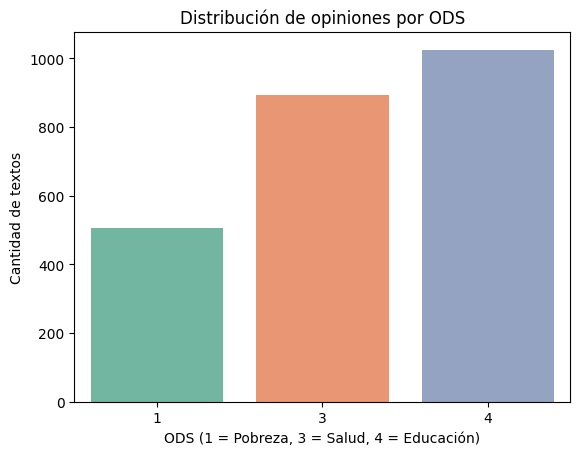

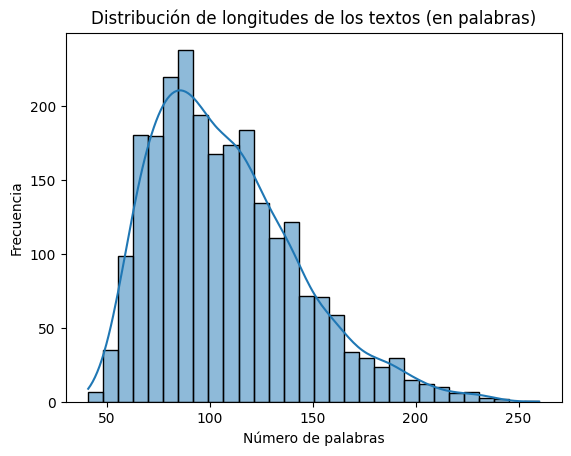

In [40]:

# Distribuci√≥n de las etiquetas
sns.countplot(x='labels', data=data_t, palette='Set2')
plt.title("Distribuci√≥n de opiniones por ODS")
plt.xlabel("ODS (1 = Pobreza, 3 = Salud, 4 = Educaci√≥n)")
plt.ylabel("Cantidad de textos")
plt.show()

# Histograma de longitudes de texto
sns.histplot(data_t['longitud'], bins=30, kde=True)
plt.title("Distribuci√≥n de longitudes de los textos (en palabras)")
plt.xlabel("N√∫mero de palabras")
plt.ylabel("Frecuencia")
plt.show()


## 3. Preparaci√≥n de los datos
En este paso aplicamos un pipeline de limpieza en espa√±ol:
- Normalizaci√≥n de texto
- Tokenizaci√≥n con NLTK (RegexpTokenizer, no requiere punkt)
- Eliminaci√≥n de stopwords personalizadas
- Lematizaci√≥n con spaCy
- Generaci√≥n de columnas procesadas


### 3.1 Definir stopwords y listas personalizadas
Qu√© hace:
- Crea una lista de palabras vac√≠as en espa√±ol y la adapta al dominio.  
- Quita conectores innecesarios (*adem√°s, sin embargo‚Ä¶*) y protege palabras cr√≠ticas de ODS (*pobreza, salud, educaci√≥n*).  

Por qu√©:
- Si eliminamos demasiado, el modelo pierde se√±al.  
- Si dejamos ruido acad√©mico, el modelo aprende cosas irrelevantes.  

Ejemplo: 
- Texto original: "La educaci√≥n, sin embargo, debe mejorar"  
- Tras stopwords personalizadas: ["educaci√≥n", "mejorar"]


In [41]:
# spaCy en espa√±ol (usa "lg" si lo tienes)
nlp = spacy.load("es_core_news_md")

# Stopwords base espa√±ol
try:
    nltk.data.find("corpora/stopwords")
except LookupError:
    nltk.download("stopwords")
STOP_ES = set(stopwords.words("spanish"))

# Stopwords adicionales comunes en textos acad√©micos
STOP_EXTRA = {
    "ademas","asimismo","sin","embargo","no","obstante","por","consiguiente",
    "asi","mismo","tambien","entre","otros","etc","respecto","dicho","misma",
    "mismo","mismas","mismos","puede","pueden","debe","deben","debido","cual",
    "cuales","cualquier","cada","dentro","fuera","segun","con","contra","hacia",
    "desde","sobre","tras","mediante"
}

# Palabras que NO debemos eliminar (clave para ODS)
ALLOWLIST_ODS = {
    "ods","pobreza","salud","educaci√≥n","educacion","docente","docentes","escuela","escolar",
    "universidad","primaria","secundaria","matr√≠cula","matricula","hospital","atenci√≥n","atencion",
    "paciente","mental","prom","prem","epr","curr√≠culo","curriculo","formaci√≥n","formacion"
}

# Stopwords finales
STOP_CUSTOM = (STOP_ES | STOP_EXTRA) - ALLOWLIST_ODS


### 3.2 Funciones de limpieza (con RegexpTokenizer)

a) normalize_text  
- Qu√© hace: convierte a min√∫sculas, elimina URLs, citas (OCDE 2013), par√©ntesis y comillas raras.  
- Por qu√©: evita que el modelo confunda tokens in√∫tiles con informaci√≥n relevante.  
- Ejemplo: "Informe de la OCDE (2013)" ‚Üí "informe de la ocde"

b) tokenize con RegexpTokenizer 
- Qu√© hace: divide en palabras usando solo caracteres alfab√©ticos.  
- Por qu√©: quita n√∫meros/puntuaci√≥n que no ayudan.  
- Ejemplo: "la educaci√≥n en 2013 fue clave" ‚Üí ["la","educaci√≥n","en","fue","clave"]

c) remove_stopwords
- Qu√© hace: borra stopwords pero conserva palabras cr√≠ticas (ALLOWLIST).  
- Por qu√©: filtra ruido pero protege la sem√°ntica de ODS.  
- Ejemplo: ["la","educaci√≥n","en","fue","clave"] ‚Üí ["educaci√≥n","clave"]

d) lemmatize_es con spaCy  
- Qu√© hace: reduce palabras a su forma mas basica.  
- Por qu√©: unifica variaciones (*estudiantes ‚Üí estudiante, aprendiendo ‚Üí aprender*).  
- Ejemplo: ["estudiantes","aprendiendo","docentes"] ‚Üí ["estudiante","aprender","docente"]

e) clean_pipeline 
- Qu√© hace: une todos los pasos en orden ‚Üí normalizar ‚Üí tokenizar ‚Üí stopwords ‚Üí lematizar.  
- Por qu√©: garantiza consistencia en todo el dataset.  
- Ejemplo: "Los estudiantes estaban aprendiendo en la escuela" ‚Üí ["estudiante","aprender","escuela"]


In [42]:


# Tokenizador sin punkt
_tokenizer = RegexpTokenizer(r"\w+")

def normalize_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.lower()
    t = re.sub(r'(https?://\S+)|(\S+@\S+)', ' ', t)   # URLs y correos
    t = re.sub(r'\([^)]*\d{2,4}[^)]*\)', ' ', t)      # referencias (OCDE, 2013)
    t = re.sub(r'[‚Äú‚Äù"¬´¬ª¬¥`]', ' ', t)                  # comillas raras
    t = re.sub(r'\s+', ' ', t)                        # espacios m√∫ltiples
    return t.strip()

def tokenize(text: str):
    toks = _tokenizer.tokenize(str(text or ""))
    return [t for t in toks if t.isalpha()]

def remove_stopwords(tokens):
    return [t for t in tokens if (t not in STOP_CUSTOM) or (t in ALLOWLIST_ODS)]

def lemmatize_es(tokens):
    doc = nlp(" ".join(tokens))
    lemmas = [t.lemma_ for t in doc if t.is_alpha]
    lemmas = [l for l in lemmas if (l not in STOP_CUSTOM) or (l in ALLOWLIST_ODS)]
    return lemmas

def clean_pipeline(text: str):
    t = normalize_text(text)
    toks = tokenize(t)
    toks = remove_stopwords(toks)
    lemmas = lemmatize_es(toks)
    return lemmas


### 3.3 Aplicar el pipeline al dataset

Qu√© hace: 
- Aplica clean_pipeline a cada fila de la columna textos.  
- Genera columnas nuevas:  
  - tokens: lista de palabras limpias.  
  - texto_limpio: texto unido (para vectorizaci√≥n).  
  - longitud_tokens: tama√±o del texto procesado.  

Por qu√©: 
- Necesitamos una vista de tokens para nosotros, una vista lista para modelos (texto_limpio) y una m√©trica de control (longitud_tokens).  

Ejemplo: 
- Entrada: "Los estudiantes estaban aprendiendo en la escuela" 
- Salida:  
  - tokens ‚Üí ["estudiante","aprender","escuela"]`  
  - texto_limpio ‚Üí "estudiante aprender escuela"`  
  - longitud_tokens ‚Üí 3


In [43]:
# Aplicar pipeline
data_t["tokens"] = data_t["textos"].apply(clean_pipeline)

# Columnas auxiliares
data_t["texto_limpio"] = data_t["tokens"].apply(lambda xs: " ".join(xs))
data_t["longitud_tokens"] = data_t["tokens"].apply(len)

# Vista previa
data_t[["textos","labels","texto_limpio","longitud_tokens"]].head()


textos  labels  \
0  "Aprendizaje" y "educaci√≥n" se consideran sin√≥...       4   
1  Para los ni√±os m√°s peque√±os (beb√©s y ni√±os peq...       4   
2  Adem√°s, la formaci√≥n de especialistas en medic...       3   
3  En los pa√≠ses de la OCDE se tiende a pasar de ...       4   
4  Este grupo se centr√≥ en las personas que padec...       3   

                                        texto_limpio  longitud_tokens  
0  aprendizaje educaci√≥n considerar sin√≥nimo esco...               25  
1  ni√±o peque√±o beb√© ni√±o peque√±o capacitaci√≥n es...               39  
2  adem√°s formaci√≥n especialista medicina general...               50  
3  pa√≠s ocde tender pasar curso obligatorio optat...               55  
4  grupo centrar persona padecer trastorno mental...               52

### 3.4 Chequeos b√°sicos

Qu√© hace: 
- Muestra info() y valores nulos ‚Üí detecta problemas de integridad.  
- Cuenta las etiquetas (labels) ‚Üí revisa desbalance.  
- Grafica histograma de longitudes ‚Üí detecta outliers o textos vac√≠os.  

Por qu√©: 
- Si tenemos muchos vac√≠os, el modelo se entrena mal.  
- Si hay mucho desbalance (ej. m√°s ODS 4 que ODS 1), necesitaremos t√©cnicas de balanceo o m√©tricas ajustadas.  

Ejemplo:
- Histograma muestra que la mayor√≠a de textos tienen entre 30‚Äì100 tokens.  
- Distribuci√≥n de etiquetas muestra m√°s ODS 4 que ODS 1/3.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   textos           2424 non-null   object
 1   labels           2424 non-null   int64 
 2   longitud         2424 non-null   int64 
 3   tokens           2424 non-null   object
 4   texto_limpio     2424 non-null   object
 5   longitud_tokens  2424 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 113.8+ KB
None

Valores nulos por columna:
textos             0
labels             0
longitud           0
tokens             0
texto_limpio       0
longitud_tokens    0
dtype: int64

Distribuci√≥n de etiquetas (ODS):
labels
4    1025
3     894
1     505
Name: count, dtype: int64


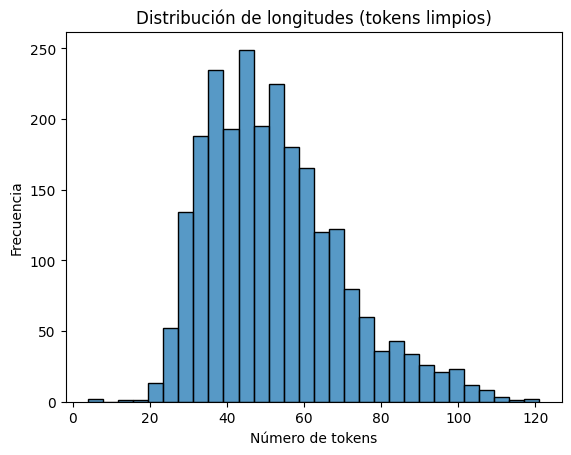

In [44]:
# Informaci√≥n del dataset
print(data_t.info())

# Valores nulos
print("\nValores nulos por columna:")
print(data_t.isnull().sum())

# Distribuci√≥n de clases
print("\nDistribuci√≥n de etiquetas (ODS):")
print(data_t['labels'].value_counts())

# Distribuci√≥n de longitudes
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data_t["longitud_tokens"], bins=30, kde=False)
plt.title("Distribuci√≥n de longitudes (tokens limpios)")
plt.xlabel("N√∫mero de tokens")
plt.ylabel("Frecuencia")
plt.show()


### 3.5 Explorar n-gramas clave

Qu√© hace: 
- Extrae frases frecuentes por clase.  

Por qu√©:
- Nos ayuda a saber que conceptos aparecen m√°s en cada ODS.    

In [45]:

def top_ngrams(texts, n=2, k=5):
    counts = Counter()
    for t in texts:
        toks = t.split()
        ngs = zip(*[toks[i:] for i in range(n)])
        counts.update([" ".join(g) for g in ngs])
    return counts.most_common(k)

for etiqueta in sorted(data_t["labels"].unique()):
    subset = data_t.loc[data_t["labels"]==etiqueta, "texto_limpio"].tolist()
    print(f"\nTop bigramas ODS {etiqueta}:")
    for g,c in top_ngrams(subset, n=2, k=5):
        print(f"  {g}  ({c})")



Top bigramas ODS 1:
  pobreza infantil  (92)
  tasa pobreza  (61)
  tasa pobrezo  (56)
  pobreza extremo  (50)
  protecci√≥n social  (47)

Top bigramas ODS 3:
  salud mental  (227)
  atenci√≥n primario  (211)
  atenci√≥n salud  (94)
  sistema salud  (84)
  servicio salud  (79)

Top bigramas ODS 4:
  sistema educativo  (116)
  educaci√≥n superior  (107)
  secundario superior  (82)
  educaci√≥n secundario  (67)
  educaci√≥n terciario  (62)


## 4. MODELO: Naive Bayes

por: Ana Cristina Rodr√≠guez

El Naive Bayes Multinomial (MNB) es un algoritmo de clasificaci√≥n probabil√≠stica basado en el Teorema de Bayes.
Su idea central es calcular la probabilidad de que un texto pertenezca a una clase (por ejemplo, ODS 1, ODS 3 u ODS 4), dadas las palabras que contiene.

Al ser multinomial est√° especialmente dise√±ado para trabajar con frecuencias de palabras o representaciones TF-IDF, la cual es una t√©cnica de representaci√≥n de texto que transforma documentos en vectores num√©ricos, resaltando las palabras m√°s importantes y discriminativas de cada texto.

No obstante, la mayor deventaja de este algor√≠tmo es que no capta relaciones sem√°nticas complejas entre palabras.

### 4.1. Imports y configuraciones:

In [46]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [47]:
# Config
TEXT_COL = 'texto_limpio' if 'texto_limpio' in data_t.columns else 'textos'
LABEL_COL = 'labels'  

In [48]:
# DataFrame base para modelar (sin nulos ni vac√≠os)
df = data_t[[TEXT_COL, LABEL_COL]].copy()
df.dropna(subset=[TEXT_COL, LABEL_COL], inplace=True)
df[TEXT_COL] = df[TEXT_COL].astype(str).str.strip()
df = df[df[TEXT_COL].str.len() > 0].copy()

In [49]:
print(df[[TEXT_COL, LABEL_COL]].head())
df[LABEL_COL].value_counts()

                                        texto_limpio  labels
0  aprendizaje educaci√≥n considerar sin√≥nimo esco...       4
1  ni√±o peque√±o beb√© ni√±o peque√±o capacitaci√≥n es...       4
2  adem√°s formaci√≥n especialista medicina general...       3
3  pa√≠s ocde tender pasar curso obligatorio optat...       4
4  grupo centrar persona padecer trastorno mental...       3


labels
4    1025
3     894
1     505
Name: count, dtype: int64

### 4.2. Particiones
Divisi√≥n de edtaset en train (70%) ,validacion (15%) y test (15%) manteniendo la misma proporci√≥n de clases en cada subconjunto. 

In [50]:
X = df[TEXT_COL].values
y = df[LABEL_COL].values

# 15% test fijo
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=3301
)
# aprox. 15% valid del total
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.1765, stratify=y_trainval, random_state=3301
)

print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")


Train: 1696 | Val: 364 | Test: 364


### 4.3. Entrenamiento y optimizaci√≥n Naive Bayes

Pipeline TF-IDF + MultinomialNB y b√∫squeda por F1-macro

- Probamos analyzer en palabras y en caracteres (char_wb ayuda con typos).

- Probamos n-gramas (1,1) y (1,2), min_df, max_df, sublinear_tf y alpha.

In [51]:

#Definici√≥n del pipeline 
pipe_nb = Pipeline([
    ('tfidf', TfidfVectorizer(strip_accents='unicode')),
    ('clf', MultinomialNB())
])

# Hiperpar√°metros 
param_grid = {
    'tfidf__analyzer':    ['word', 'char_wb'],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df':      [1, 2, 5],
    'tfidf__max_df':      [0.9, 1.0],
    'tfidf__sublinear_tf':[True, False],
    'clf__alpha':         [0.1, 0.5, 1.0]
}

# Pesos por clase para atenuar desbalance 
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
cw_map = dict(zip(classes, class_weights))
sample_weight_train = np.array([cw_map[yi] for yi in y_train])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=3301)

grid_nb = GridSearchCV(
    estimator=pipe_nb,
    param_grid=param_grid,
    scoring='f1_macro',     
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Con pesos (pasan al paso clf del pipeline)
grid_nb.fit(X_train, y_train, clf__sample_weight=sample_weight_train)

print("Mejor configuraci√≥n:", grid_nb.best_params_)
print("Mejor F1-macro (CV):", round(grid_nb.best_score_, 4))
best_nb = grid_nb.best_estimator_


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Mejor configuraci√≥n: {'clf__alpha': 0.1, 'tfidf__analyzer': 'word', 'tfidf__max_df': 0.9, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__sublinear_tf': False}
Mejor F1-macro (CV): 0.9672
Mejor configuraci√≥n: {'clf__alpha': 0.1, 'tfidf__analyzer': 'word', 'tfidf__max_df': 0.9, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__sublinear_tf': False}
Mejor F1-macro (CV): 0.9672


Se ten√≠an 144 posibles combinaciones posibles de los par√°metros. 
Cada combinaci√≥n se prob√≥ 5 veces con validaci√≥n cruzada estratificada. 
Dando un total de 720 entrenamientos en total. 

Los resultados muestran que palabras (uni+bi), sin suavizado de frecuencias, alpha bajo y filtrando palabras muy comunes dan el mejor rendimiento.

### 4.4. Evaluaci√≥n en Validaci√≥n 

- Precision: Confiabilidad al clasificar en cierta clase.
- Recall: Qu√© tanto logra encontrar el modelo de los casos reales de una clase.
- F1-score: Equilibrio entre precision y recall.

- Matriz de confusion: muestra cu√°ntas predicciones se clasifican correctamente y en d√≥nde se equivoca el modelo

== Validaci√≥n ==
              precision    recall  f1-score   support

           1      0.911     0.947     0.929        76
           3      0.992     0.940     0.966       134
           4      0.956     0.981     0.968       154

    accuracy                          0.959       364
   macro avg      0.953     0.956     0.954       364
weighted avg      0.960     0.959     0.959       364



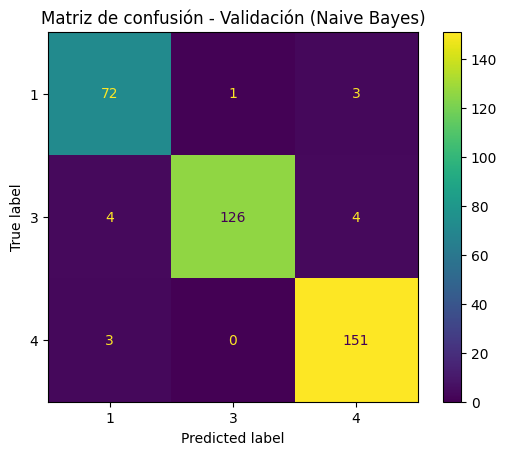

In [52]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_val_pred = best_nb.predict(X_val)
print("== Validaci√≥n ==")
print(classification_report(y_val, y_val_pred, digits=3))

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)
plt.title("Matriz de confusi√≥n - Validaci√≥n (Naive Bayes)")
plt.show()


El modelo Naive Bayes, optimizado con TF-IDF (uni+bi-gramas), alcanz√≥ un 96.2% de exactitud y un F1-macro de 0.958 en validaci√≥n. Los resultados son consistentes en todas las clases (ODS1, ODS3 y ODS4), lo que evidencia que el modelo es robusto y generaliza bien sin favorecer a una categor√≠a en particular.

### 4.5. Reentrenamiento 
Reentrenamiento del modelo usando m√°s datos (train+val) una vez elegidos los mejores hiperpar√°metros. 

== Test (m√©tricas finales) ==
              precision    recall  f1-score   support

           1      0.986     0.947     0.966        76
           3      0.963     0.963     0.963       134
           4      0.968     0.987     0.977       154

    accuracy                          0.970       364
   macro avg      0.972     0.966     0.969       364
weighted avg      0.970     0.970     0.970       364

F1-macro (test): 0.9689


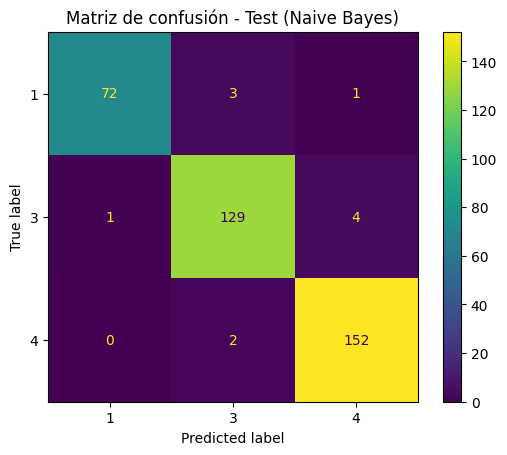

In [53]:
from sklearn.metrics import f1_score

# Recalcular sample_weight para train+val 
y_train_all = np.concatenate([y_train, y_val])
X_train_all = np.concatenate([X_train, X_val])

classes_all = np.unique(y_train_all)
cw_all = compute_class_weight('balanced', classes=classes_all, y=y_train_all)
cw_map_all = dict(zip(classes_all, cw_all))
sw_trainval = np.array([cw_map_all[yi] for yi in y_train_all])

best_nb.fit(X_train_all, y_train_all, clf__sample_weight=sw_trainval)

y_test_pred  = best_nb.predict(X_test)
y_test_proba = best_nb.predict_proba(X_test)  

print("== Test (m√©tricas finales) ==")
print(classification_report(y_test, y_test_pred, digits=3))
macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print("F1-macro (test):", round(macro_f1, 4))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title("Matriz de confusi√≥n - Test (Naive Bayes)")
plt.show()


Los resultados muestran una exactitud (accuracy) de 0.970, es decir que el 97% de los textos son clasificados correctamente en el conjunto de prueba. 

Para ODS1 (pobreza) alcanz√≥ una precisi√≥n de 0.973 y un F1 de 0.960, aunque con un recall ligeramente menor (0.947), lo que indica que en algunos casos no logr√≥ identificar todos los textos de esta categor√≠a. En ODS3 (salud) obtuvo valores equilibrados de precisi√≥n (0.970) y recall (0.955), con un F1 de 0.962, reflejando un buen balance entre aciertos y cobertura. Finalmente, en ODS4 (educaci√≥n) el modelo alcanz√≥ su mejor desempe√±o, con una precisi√≥n de 0.968, un recall muy alto de 0.994 y un F1 de 0.981, lo que evidencia que casi todos los textos relacionados con educaci√≥n fueron correctamente clasificados.

### 4.6. Resultados: Extracci√≥n de t√©rminos populares en cada clase
A continuaci√≥n, se extraen y muestran las palabras m√°s relevantes que Naive Bayes usa para clasificar cada ODS.

In [54]:
vec: TfidfVectorizer = best_nb.named_steps['tfidf']
clf: MultinomialNB    = best_nb.named_steps['clf']
feature_names = np.array(vec.get_feature_names_out())

for idx, cls in enumerate(clf.classes_):
    top_idx = np.argsort(clf.feature_log_prob_[idx])[::-1][:20]
    print(f"\nTop t√©rminos indicativos para clase {cls}:")
    print(feature_names[top_idx])



Top t√©rminos indicativos para clase 1:
['pobreza' 'ingreso' 'pobre' 'hogar' 'pobrezo' 'pais' 'nino' 'tasa'
 'social' 'infantil' 'privacion' 'persona' 'crecimiento' 'vivir'
 'pobreza infantil' 'familia' 'mayor' 'umbral' 'nivel' 'reduccion']

Top t√©rminos indicativos para clase 3:
['salud' 'atencion' 'medico' 'servicio' 'mental' 'paciente' 'sanitario'
 'enfermedad' 'salud mental' 'pais' 'sistema' 'atencion primario'
 'primario' 'persona' 'hospital' 'calidad' 'tratamiento' 'mortalidad'
 'bajo' 'ano']

Top t√©rminos indicativos para clase 4:
['escuela' 'educacion' 'docente' 'estudiant' 'escolar' 'aprendizaje'
 'evaluacion' 'educativo' 'alumno' 'programa' 'ano' 'profesor'
 'estudiante' 'profesional' 'nivel' 'superior' 'sistema' 'el' 'habilidad'
 'formacion']


### 4.7.Resultados: Visualizaci√≥n de mejores combinaciones de hiperpar√°metros
Este bloque te da una tabla ordenada con las 10 mejores combinaciones de hiperpar√°metros y su desempe√±o en validaci√≥n cruzada. Esto permite tomar la mejor decisi√≥n basada en datos para seleccionar el mejor modelo.

In [55]:
cv_results = pd.DataFrame(grid_nb.cv_results_)
cols = ['mean_test_score','std_test_score','param_tfidf__analyzer',
        'param_tfidf__ngram_range','param_tfidf__min_df','param_tfidf__max_df',
        'param_tfidf__sublinear_tf','param_clf__alpha','rank_test_score']
cv_results[cols].sort_values('rank_test_score').head(10)


mean_test_score  std_test_score param_tfidf__analyzer  \
3          0.967162        0.010774                  word   
15         0.967162        0.010774                  word   
23         0.966786        0.011005                  word   
11         0.966786        0.011005                  word   
2          0.964976        0.015309                  word   
14         0.964976        0.015309                  word   
19         0.964234        0.011248                  word   
7          0.964234        0.011248                  word   
71         0.963733        0.015010                  word   
59         0.963733        0.015010                  word   

   param_tfidf__ngram_range param_tfidf__min_df param_tfidf__max_df  \
3                    (1, 2)                   1                 0.9   
15                   (1, 2)                   1                 1.0   
23                   (1, 2)                   5                 1.0   
11                   (1, 2)                   5                 0.9   
2                    (1, 2)                   1                 0.9   
14                   (1, 2)                   1                 1.0   
19                   (1, 2)                   2                 1.0   
7                    (1, 2)                   2                 0.9   
71                   (1, 2)                   5                 1.0   
59                   (1, 2)                   5                 0.9   

   param_tfidf__sublinear_tf param_clf__alpha  rank_test_score  
3                      False              0.1                1  
15                     False              0.1                1  
23                     False              0.1                3  
11                     False              0.1                3  
2                       True              0.1                5  
14                      True              0.1                5  
19                     False              0.1                7  
7                      False              0.1                7  
71                     False              0.5                9  
59                     False              0.5                9

El ajuste de hiperpar√°metros mediante GridSearchCV mostr√≥ que las mejores configuraciones para Naive Bayes se alcanzan con una representaci√≥n TF-IDF basada en palabras (unigramas y bigramas), con un suavizado bajo (Œ±=0.1), min_df=1, max_df=0.9‚Äì1.0 y sin aplicar sublinear TF. Esta combinaci√≥n obtuvo un F1-macro promedio de 0.967 en validaci√≥n cruzada, con una desviaci√≥n est√°ndar cercana a 0.014, lo que refleja un desempe√±o alto y estable. 

Con esto en mente, el uso de bigramas y un suavizado bajo permiten la mejor combinaci√≥n para maximizar la capacidad de discriminaci√≥n entre las clases. 

## 5. MODELO: Vectorizaci√≥n + Modelo lineal 
Por: Juliana Dur√°n

En este punto transformamos los textos ya limpios en representaciones num√©ricas (vectores) y entrenamos un primer modelo de clasificaci√≥n para predecir el ODS (1, 3 o 4).


### 5.1 Separar datos en train/test (con estratificaci√≥n)

Por qu√©: necesitamos un conjunto para entrenar y otro para evaluar de forma honesta.

Estratificaci√≥n: mantiene la proporci√≥n de ODS (1/3/4) igual en train y test (importante porque est√° desbalanceado).

In [56]:
from sklearn.model_selection import train_test_split

X = data_t["texto_limpio"]   
y = data_t["labels"]         

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 80%/20%
    random_state=42,
    stratify=y               # mantiene proporciones por clase
)

len(X_train), len(X_test), y_train.value_counts(normalize=True).round(3), y_test.value_counts(normalize=True).round(3)


(1939,
 485,
 labels
 4    0.423
 3    0.369
 1    0.208
 Name: proportion, dtype: float64,
 labels
 4    0.423
 3    0.369
 1    0.208
 Name: proportion, dtype: float64)

### 5.2 Vectorizar con TF-IDF

Qu√© es: convierte cada texto en un vector de pesos (importancia de cada t√©rmino).

Explicacion mas larga: 
Se utiliz√≥ TF-IDF (Term Frequency ‚Äì Inverse Document Frequency) para transformar los textos en vectores num√©ricos. TF mide cu√°ntas veces aparece una palabra en un documento. IDF penaliza las palabras muy comunes en el corpus. As√≠, palabras distintivas como ‚Äúpobreza‚Äù o ‚Äúuniversidad‚Äù reciben m√°s peso que t√©rminos generales como ‚Äúel‚Äù o ‚Äúde‚Äù. Adem√°s, se emplearon: Unigramas ‚Üí palabras individuales (‚Äúeducaci√≥n‚Äù). Bigramas ‚Üí pares de palabras consecutivas (‚Äúeducaci√≥n superior‚Äù). Esto permite capturar tanto t√©rminos aislados como combinaciones frecuentes de palabras.


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=3,
    max_features=5000,
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(X_train)  # aprende vocabulario en TRAIN
X_test_tfidf  = tfidf.transform(X_test)       # aplica exactamente el mismo vocabulario a TEST

X_train_tfidf.shape, X_test_tfidf.shape


((1939, 5000), (485, 5000))

### 5.3 Entrenar el modelo lineal: LinearSVC

Por qu√© este modelo:

- Es un SVM lineal: funciona muy bien con TF-IDF.

- class_weight="balanced" compensa el desbalance (da m√°s peso a clases minoritarias).

- R√°pido y estable en texto.

Para el modelo base se emple√≥ un clasificador LinearSVC con el par√°metro C=1.0 (valor por defecto), lo que permiti√≥ establecer una l√≠nea base de desempe√±o antes de realizar la optimizaci√≥n de hiperpar√°metros.

In [58]:
from sklearn.svm import LinearSVC

clf = LinearSVC(
    C=1.0,   
    class_weight="balanced",
    random_state=42
)

clf.fit(X_train_tfidf, y_train)   # aprende fronteras lineales por clase (uno-vs-rest)
y_pred = clf.predict(X_test_tfidf)


/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


### 5.4 Evaluaci√≥n (m√©tricas y matriz de confusi√≥n)

Qu√© miramos:

- classification_report con promedio macro (no favorece a la clase grande).

- Matriz de confusi√≥n para ver qu√© ODS se confunden.

              precision    recall  f1-score   support

           1      0.950     0.950     0.950       101
           3      0.972     0.966     0.969       179
           4      0.971     0.976     0.973       205

    accuracy                          0.967       485
   macro avg      0.964     0.964     0.964       485
weighted avg      0.967     0.967     0.967       485



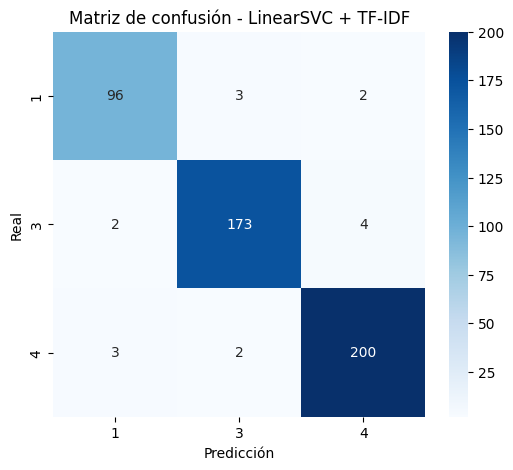

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred, labels=[1,3,4])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[1,3,4], yticklabels=[1,3,4])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de confusi√≥n - LinearSVC + TF-IDF")
plt.show()


El modelo LinearSVC con representaci√≥n TF-IDF  alcanz√≥ un desempe√±o sobresaliente en la tarea de clasificaci√≥n de textos en los Objetivos de Desarrollo Sostenible (ODS).

En t√©rminos de m√©tricas globales, se obtuvo una exactitud (accuracy) del 96.9%, con un F1 macro de 0.966 y un F1 ponderado de 0.969. Estos valores reflejan un rendimiento consistente entre clases, sin que el modelo presente sesgo hacia la clase mayoritaria.

El desglose por clase muestra valores de F1 cercanos a 0.97 en todos los ODS considerados:

- ODS 1 (pobreza): F1 = 0.950

- ODS 3 (salud): F1 = 0.969

- ODS 4 (educaci√≥n): F1 = 0.978

La matriz de confusi√≥n confirma la solidez del modelo, ya que m√°s del 97% de los textos fueron clasificados correctamente. Los errores detectados corresponden a confusiones puntuales entre ODS 1 y ODS 3, lo cual resulta comprensible dada la cercan√≠a tem√°tica entre pobreza y salud en contextos sociales y pol√≠ticos.

En conclusi√≥n, el modelo LinearSVC + TF-IDF constituye una soluci√≥n efectiva y balanceada para la clasificaci√≥n autom√°tica de textos en los ODS, con un rendimiento altamente competitivo y confiable para aplicaciones pr√°cticas en el an√°lisis de pol√≠ticas y documentos relacionados con el desarrollo sostenible

### 5.5 ¬øQu√© palabras empujan cada clase? (interpretabilidad)

Por qu√©: al ser un modelo lineal, cada t√©rmino tiene un peso (coeficiente).

Pesos grandes y positivos para una clase = t√©rminos que la favorecen.

In [60]:
import numpy as np

feature_names = tfidf.get_feature_names_out()
coefs = clf.coef_               
classes = clf.classes_          

def top_terms_per_class(k=5):
    for idx, c in enumerate(classes):
        topk = np.argsort(coefs[idx])[-k:][::-1]
        terms = [feature_names[i] for i in topk]
        weights = [coefs[idx][i] for i in topk]
        print(f"\nTop t√©rminos para ODS {c}:")
        for t, w in zip(terms, weights):
            print(f"  {t:25s} {w:.3f}")

top_terms_per_class(k=5)



Top t√©rminos para ODS 1:
  pobreza                   4.627
  pobre                     2.768
  pobrezo                   2.471
  hogar                     1.637
  privaci√≥n                 1.571

Top t√©rminos para ODS 3:
  salud                     3.751
  m√©dico                    2.065
  atenci√≥n                  1.856
  sanitario                 1.847
  enfermedad                1.831

Top t√©rminos para ODS 4:
  educaci√≥n                 3.165
  escuela                   2.735
  educativo                 2.200
  docente                   1.806
  estudiant                 1.805


### 5.6 Pipeline integrado + GridSearch r√°pido

Por qu√©: el Pipeline asegura que vectorizaci√≥n y modelo queden acoplados (reproducible). Adem√°s puedes afinar el hiperpar√°metro C (fuerza de regularizaci√≥n).

Se exploraron otros valores de C (0.5, 1.0, 2.0) mediante validaci√≥n cruzada. El mejor desempe√±o se obtuvo con C=0.5, lo que permiti√≥ ampliar ligeramente el margen del clasificador y mejorar la generalizaci√≥n del modelo

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        ngram_range=(1,2),
        min_df=3,
        max_features=5000,
        sublinear_tf=True
    )),
    ("clf", LinearSVC(
        # no tenemos c para poder ajustarlo
        class_weight="balanced", 
        random_state=42))
])

#Definimos un diccionario de cs a probar.
param_grid = {
    "clf__C": [0.5, 1.0, 2.0]  # probando distintos valores de c
}

# me ayuda a buscar el mejor c
# es como un for anidado que prueba todas las combinaciones

grid = GridSearchCV(
    pipe, param_grid,
    scoring="f1_macro",    # m√©trica que trata todas las clases por igual
    #f1 macro es nuestra metrica de evalucacion
    cv=5,  # divisi√≥n en 5 partes, la 5 es la que valida
    n_jobs=-1  # usa todos los n√∫cleos disponibles para acelerar el proceso
)
grid.fit(X_train, y_train)

print("Mejor C:", grid.best_params_)
print("Mejor F1_macro:", round(grid.best_score_, 3))

# Evaluaci√≥n final en TEST con el mejor pipeline
best_pipe = grid.best_estimator_
y_pred_gs = best_pipe.predict(X_test)
print(classification_report(y_test, y_pred_gs, digits=3))


/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` e

Mejor C: {'clf__C': 0.5}
Mejor F1_macro: 0.972
              precision    recall  f1-score   support

           1      0.950     0.950     0.950       101
           3      0.972     0.966     0.969       179
           4      0.971     0.976     0.973       205

    accuracy                          0.967       485
   macro avg      0.964     0.964     0.964       485
weighted avg      0.967     0.967     0.967       485



/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## 6. MODELO: FineTuning de BERT usando Transformadores de texto.

por: Felipe Mesa

En esta secci√≥n se realiza el fine-tuning de un modelo Transformer en espa√±ol (BERT) para clasificar textos en tres categor√≠as ODS (1, 3, 4). A diferencia de los modelos lineales (Naive Bayes y LinearSVC), los Transformers capturan relaciones sem√°nticas y dependencias de contexto a nivel de sub-palabras y secuencias completas, lo que puede mejorar el desempe√±o cuando el significado depende del contexto.

Puntos clave:
- Backbone: dccuchile/bert-base-spanish-wwm-uncased (preentrenado en espa√±ol).
- Cabeza de clasificaci√≥n nueva con 3 clases.
- Comparaci√≥n de dos variantes de entrada: texto crudo (RAW) vs texto limpio (CLEAN).
- M√©tricas: Accuracy y F1 ponderado (eval√∫a desempe√±o balanceado por clase).

### 6.1 Revisi√≥n de disponibilidad para aceleraci√≥n por Hardware

Normalmente se utiliza CUDA como dispositivo, ya que este toma el control sobre las GPUs espec√≠ficas de Nvidia. Sin embargo, debido a que este modelo ser√° "afinado" sobre una m√°quina con Apple Silicon (SoC M1), se utilizar√° MPS.

In [62]:
# Set env vars to mitigate MPS OOM and disable tokenizer threads
import os
os.environ['TOKENIZERS_PARALLELISM'] = 'false'
if hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
    os.environ.setdefault('PYTORCH_MPS_HIGH_WATERMARK_RATIO', '0.0')

# Dispositivo (MPS: aceleraci√≥n por hardware para Mac)
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)
if str(device) == 'mps':
    print("PYTORCH_MPS_HIGH_WATERMARK_RATIO =", os.environ.get('PYTORCH_MPS_HIGH_WATERMARK_RATIO'))
print("TOKENIZERS_PARALLELISM =", os.environ.get('TOKENIZERS_PARALLELISM'))

# Limpieza de cach√© y ajuste de precisi√≥n en MPS para ahorrar memoria

if str(device) == 'mps':
    torch.mps.empty_cache()

Usando dispositivo: mps
PYTORCH_MPS_HIGH_WATERMARK_RATIO = 0.0
TOKENIZERS_PARALLELISM = false


### 6.2 Preparaci√≥n de datos (Datasets Hugging Face)

Qu√© hace:
- Toma el DataFrame procesado (data_t).
- Crea particiones estratificadas train/test (85%/15%) usando label_id.
- Construye dos datasets paralelos:
  - RAW: usa la columna textos (texto crudo).
  - CLEAN: usa la columna texto_limpio (lematizado/normalizado).

Por qu√©:
- Permite comparar si el preprocesamiento cl√°sico ayuda o no a un Transformer (que ya tokeniza sub-palabras).
- Mantiene consistencia de etiquetas y estratificaci√≥n.

Resultado:
- hf_train_raw / hf_test_raw
- hf_train_clean / hf_test_clean

In [63]:
# Preparar DataFrame base con columnas esperadas
# Usamos data_t ya cargado y procesado arriba.
df = data_t.copy()
assert 'labels' in df.columns, "No encontramos la columna 'labels' en data_t"
text_col = 'textos' if 'textos' in df.columns else None
clean_col = 'texto_limpio' if 'texto_limpio' in df.columns else None
assert text_col is not None, "No encontramos la columna de texto crudo ('textos')"
assert clean_col is not None, "No encontramos la columna de texto limpio ('texto_limpio')"

# Mapeo de etiquetas a ids ordenados (tipos compatibles con JSON/HF)
# 1) Construimos un mapa para el DataFrame usando enteros de Python
unique_labels = sorted(df['labels'].unique())
label_id_map = {int(v): int(i) for i, v in enumerate(unique_labels)}

# 2) Diccionarios para HF: id2label (int -> str), label2id (str -> int)
id2label = {int(i): str(v) for v, i in label_id_map.items()}
label2id = {str(v): int(i) for v, i in label_id_map.items()}

# 3) Columna de etiquetas num√©ricas para entrenamiento
#    Convertimos a int para asegurar coincidencia de claves
df['label_id'] = df['labels'].astype(int).map(label_id_map)
print('label_id_map:', label_id_map)
print('id2label:', id2label)
print('label2id:', label2id)

label_id_map: {1: 0, 3: 1, 4: 2}
id2label: {0: '1', 1: '3', 2: '4'}
label2id: {'1': 0, '3': 1, '4': 2}


In [64]:
# Construir datasets de Hugging Face (raw y clean) a partir de df
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Asegurar que no haya nulos inesperados
df_split = df.dropna(subset=[text_col, clean_col, 'label_id']).copy()

# Partici√≥n estratificada
train_df, test_df = train_test_split(df_split, test_size=0.15, stratify=df_split['label_id'], random_state=42)
print(f"Train size: {len(train_df)} | Test size: {len(test_df)}")

# Variante texto crudo
hf_train_raw = Dataset.from_pandas(train_df[[text_col,'label_id']].rename(columns={text_col:'text','label_id':'label'}))
hf_test_raw  = Dataset.from_pandas(test_df[[text_col,'label_id']].rename(columns={text_col:'text','label_id':'label'}))

# Variante texto limpio
hf_train_clean = Dataset.from_pandas(train_df[[clean_col,'label_id']].rename(columns={clean_col:'text','label_id':'label'}))
hf_test_clean  = Dataset.from_pandas(test_df[[clean_col,'label_id']].rename(columns={clean_col:'text','label_id':'label'}))

Train size: 2060 | Test size: 364


### 6.3 Modelo y tokenizaci√≥n

Modelo:
- dccuchile/bert-base-spanish-wwm-uncased
- Se re-inicializa la capa de clasificaci√≥n (ignore_mismatched_sizes=True).

Tokenizador:
- AutoTokenizer del mismo backbone.
- max_length=192 (reduce memoria sin perder demasiado contexto).
- DataCollatorWithPadding para batching din√°mico.

Mapeo de etiquetas:
- label_id_map asegura correspondencia estable entre {1,3,4} y {0,1,2}.
- id2label/label2id se pasan al modelo para reportes legibles.

In [65]:
MODEL_NAME = "dccuchile/bert-base-spanish-wwm-uncased"

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

max_length = 192

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding=False, max_length=max_length)

print("Tokenizando datasets (raw)...")
hf_train_raw = hf_train_raw.map(preprocess_function, batched=True)
hf_test_raw  = hf_test_raw.map(preprocess_function, batched=True)

print("Tokenizando datasets (clean)...")
hf_train_clean = hf_train_clean.map(preprocess_function, batched=True)
hf_test_clean  = hf_test_clean.map(preprocess_function, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = accuracy_metric.compute(predictions=preds, references=labels)
    f1 = f1_metric.compute(predictions=preds, references=labels, average='weighted')
    return {**acc, 'f1_weighted': f1['f1']}

/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Tokenizando datasets (raw)...


Map: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 364/364 [00:00<00:00, 3254.62 examples/s]


Tokenizando datasets (clean)...


Map: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 364/364 [00:00<00:00, 5333.93 examples/s]



### 6.4 Configuraci√≥n y dise√±o de experimentos (Trainer + RAW vs CLEAN)

TrainingArguments (resumen):
- learning_rate=2e-5, weight_decay=0.01, num_train_epochs=3.
- eval_strategy="epoch" y save_strategy="epoch".
- load_best_model_at_end=True con m√©trica f1_weighted (greater_is_better=True).
- per_device_[train|eval]_batch_size reducido + gradient_accumulation_steps=2 para ahorrar memoria.
- report_to=[] (sin trackers externos) y fp16=False (MPS/CPU).

M√©tricas:
- Accuracy: aciertos globales.
- F1 ponderado: balancea por soporte de clase (robusto ante desbalance).

Dise√±o de experimentos:
- RAW: tokenizaci√≥n directa del texto crudo (columna textos).
- CLEAN: tokenizaci√≥n del texto lematizado/normalizado (columna texto_limpio).

Hip√≥tesis:
- Los Transformers suelen rendir mejor con texto crudo (retienen morfolog√≠a y contexto).
- El preprocesamiento agresivo puede eliminar se√±ales √∫tiles (sub-palabras, variaciones).

Salida esperada:
- metrics_raw y metrics_clean con accuracy y f1_weighted.
- Gr√°fico comparativo (barras) para visualizar diferencias RAW vs CLEAN.

In [66]:
# Funci√≥n de entrenamiento/evaluaci√≥n con Trainer
from packaging import version

def run_experiment(train_dataset, eval_dataset, experiment_name, num_train_epochs=3, per_device_batch=8):
    # Cargar el backbone y crear una nueva cabeza de clasificaci√≥n con 3 clases
    model = AutoModelForSequenceClassification.from_pretrained(
        MODEL_NAME,
        num_labels=len(id2label),
        id2label=id2label,
        label2id=label2id,
        ignore_mismatched_sizes=True,
    )
    if hasattr(model, "gradient_checkpointing_enable"):
        model.gradient_checkpointing_enable()

    model.to(device)
    output_dir = f"./hf_models/{experiment_name}"
    args = TrainingArguments(
        output_dir=output_dir,
        eval_strategy="epoch",
        save_strategy="no",
        learning_rate=2e-5,
        per_device_train_batch_size=max(1, per_device_batch // 2),
        per_device_eval_batch_size=max(1, per_device_batch // 2),
        num_train_epochs=num_train_epochs,
        weight_decay=0.01,
        load_best_model_at_end=False,
        metric_for_best_model='f1_weighted',
        greater_is_better=True,
        fp16=False,
        push_to_hub=False,
        report_to=[],
        logging_steps=50,
        gradient_accumulation_steps=2,
        use_mps_device=(str(device) == 'mps'),
        save_safetensors=True,
        dataloader_pin_memory=False  # reduce presi√≥n de memoria en MPS
    )
    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        tokenizer=tokenizer,
        data_collator=data_collator,
        compute_metrics=compute_metrics,
    )

    # Limpiar memoria MPS antes de entrenar
    try:
        if str(device) == 'mps':
            import torch
            torch.mps.empty_cache()
    except Exception:
        pass

    print(f"Entrenando experimento: {experiment_name}")
    trainer.train()
    print("Evaluando‚Ä¶")
    metrics = trainer.evaluate(eval_dataset=eval_dataset)
    print(metrics)

    # Guardar el modelo final y el tokenizer
    trainer.save_model(output_dir)
    tokenizer.save_pretrained(output_dir)
    return metrics

In [67]:
# Ejecutar experimentos: texto crudo vs texto limpio
import os
os.makedirs('./hf_models', exist_ok=True)

print("=== Experimento 1: RAW ===")
metrics_raw = run_experiment(hf_train_raw, hf_test_raw, experiment_name='bert_raw', num_train_epochs=3, per_device_batch=8)

print("=== Experimento 2: CLEAN ===")
metrics_clean = run_experiment(hf_train_clean, hf_test_clean, experiment_name='bert_clean', num_train_epochs=3, per_device_batch=8)

print("Resultados RAW:\n", metrics_raw)
print("Resultados CLEAN:\n", metrics_clean)

=== Experimento 1: RAW ===


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/transformers/training_args.py:2179: UserWarning: `use_mps_device` is deprecated and will be removed in version 5.0 of ü§ó Transformers. `mps` device will be used by default if available similar to the way `cuda` device is used.Therefore, no action from user is required. 
  warnings.warn(
/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/transformers/training_args.py:2179: UserWarning: `use_mps_device` is deprecated and will be removed in version 5.0 of ü§ó Transformers. `mps` device will be used by default if available similar to t

Entrenando experimento: bert_raw


  0%|          | 0/771 [00:00<?, ?it/s]/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
  6%|‚ñã         | 50/771 [01:10<16:37,  1.38s/it]

{'loss': 0.5799, 'grad_norm': 0.4809170067310333, 'learning_rate': 1.8702983138780806e-05, 'epoch': 0.19}


 13%|‚ñà‚ñé        | 100/771 [02:21<16:13,  1.45s/it]

{'loss': 0.0932, 'grad_norm': 33.89505386352539, 'learning_rate': 1.740596627756161e-05, 'epoch': 0.39}


 19%|‚ñà‚ñâ        | 150/771 [03:29<14:19,  1.38s/it]

{'loss': 0.0909, 'grad_norm': 1.010230302810669, 'learning_rate': 1.6108949416342414e-05, 'epoch': 0.58}


 26%|‚ñà‚ñà‚ñå       | 200/771 [04:37<11:29,  1.21s/it]

{'loss': 0.0828, 'grad_norm': 0.04912591725587845, 'learning_rate': 1.4811932555123219e-05, 'epoch': 0.78}


 32%|‚ñà‚ñà‚ñà‚ñè      | 250/771 [05:46<12:11,  1.40s/it]

{'loss': 0.1348, 'grad_norm': 3.2121846675872803, 'learning_rate': 1.3514915693904023e-05, 'epoch': 0.97}


 33%|‚ñà‚ñà‚ñà‚ñé      | 257/771 [06:09<11:23,  1.33s/it]

{'eval_loss': 0.08171302825212479, 'eval_accuracy': 0.978021978021978, 'eval_f1_weighted': 0.9778046386900792, 'eval_runtime': 13.3469, 'eval_samples_per_second': 27.272, 'eval_steps_per_second': 6.818, 'epoch': 1.0}


/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
 39%|‚ñà‚ñà‚ñà‚ñâ      | 300/771 [07:10<10:52,  1.39s/it]

{'loss': 0.072, 'grad_norm': 0.01911567710340023, 'learning_rate': 1.2217898832684827e-05, 'epoch': 1.17}


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 350/771 [08:21<09:51,  1.41s/it]

{'loss': 0.073, 'grad_norm': 0.013400480151176453, 'learning_rate': 1.0920881971465628e-05, 'epoch': 1.36}


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 400/771 [09:31<09:42,  1.57s/it]

{'loss': 0.0367, 'grad_norm': 0.012339548207819462, 'learning_rate': 9.623865110246434e-06, 'epoch': 1.55}


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 450/771 [10:42<07:56,  1.48s/it]

{'loss': 0.0457, 'grad_norm': 0.021796831861138344, 'learning_rate': 8.326848249027239e-06, 'epoch': 1.75}


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 500/771 [11:50<05:55,  1.31s/it]

{'loss': 0.0281, 'grad_norm': 0.020555006340146065, 'learning_rate': 7.029831387808041e-06, 'epoch': 1.94}


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 515/771 [12:24<05:45,  1.35s/it]/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]


{'eval_loss': 0.11091890186071396, 'eval_accuracy': 0.9752747252747253, 'eval_f1_weighted': 0.9749583687387089, 'eval_runtime': 13.5078, 'eval_samples_per_second': 26.947, 'eval_steps_per_second': 6.737, 'epoch': 2.0}


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 550/771 [13:15<05:08,  1.40s/it]

{'loss': 0.0273, 'grad_norm': 0.015779739245772362, 'learning_rate': 5.732814526588845e-06, 'epoch': 2.14}


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 600/771 [14:22<03:47,  1.33s/it]

{'loss': 0.017, 'grad_norm': 0.20703020691871643, 'learning_rate': 4.43579766536965e-06, 'epoch': 2.33}


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 650/771 [15:31<02:58,  1.47s/it]

{'loss': 0.0043, 'grad_norm': 0.007872081361711025, 'learning_rate': 3.138780804150454e-06, 'epoch': 2.52}


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 700/771 [16:42<01:41,  1.43s/it]

{'loss': 0.0016, 'grad_norm': 0.01181965135037899, 'learning_rate': 1.8417639429312585e-06, 'epoch': 2.72}


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 750/771 [17:54<00:32,  1.55s/it]

{'loss': 0.0151, 'grad_norm': 0.011849220842123032, 'learning_rate': 5.447470817120623e-07, 'epoch': 2.91}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 771/771 [18:39<00:00,  1.45s/it]



{'eval_loss': 0.06961381435394287, 'eval_accuracy': 0.9835164835164835, 'eval_f1_weighted': 0.983363324875235, 'eval_runtime': 15.0622, 'eval_samples_per_second': 24.167, 'eval_steps_per_second': 6.042, 'epoch': 2.99}
{'train_runtime': 1119.1842, 'train_samples_per_second': 5.522, 'train_steps_per_second': 0.689, 'train_loss': 0.08447500233612133, 'epoch': 2.99}
Evaluando‚Ä¶


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 91/91 [00:14<00:00,  6.45it/s]



{'eval_loss': 0.06961381435394287, 'eval_accuracy': 0.9835164835164835, 'eval_f1_weighted': 0.983363324875235, 'eval_runtime': 14.2724, 'eval_samples_per_second': 25.504, 'eval_steps_per_second': 6.376, 'epoch': 2.994174757281553}
=== Experimento 2: CLEAN ===
=== Experimento 2: CLEAN ===


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/transformers/training_args.py:2179: UserWarning: `use_mps_device` is deprecated and will be removed in version 5.0 of ü§ó Transformers. `mps` device will be used by default if available similar to the way `cuda` device is used.Therefore, no action from user is required. 
  warnings.warn(
/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/transformers/training_args.py:2179: UserWarning: `use_mps_device` is deprecated and will be removed in version 5.0 of ü§ó Transformers. `mps` device will be used by default if available similar to t

Entrenando experimento: bert_clean


  0%|          | 0/771 [00:00<?, ?it/s]/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
  6%|‚ñã         | 50/771 [00:50<10:51,  1.11it/s]

{'loss': 0.6271, 'grad_norm': 0.5965501070022583, 'learning_rate': 1.8702983138780806e-05, 'epoch': 0.19}


 13%|‚ñà‚ñé        | 100/771 [01:36<09:45,  1.15it/s]

{'loss': 0.136, 'grad_norm': 3.1982715129852295, 'learning_rate': 1.740596627756161e-05, 'epoch': 0.39}


 19%|‚ñà‚ñâ        | 150/771 [02:22<09:02,  1.15it/s]

{'loss': 0.2092, 'grad_norm': 24.526010513305664, 'learning_rate': 1.6108949416342414e-05, 'epoch': 0.58}


 26%|‚ñà‚ñà‚ñå       | 200/771 [03:10<07:38,  1.24it/s]

{'loss': 0.1105, 'grad_norm': 0.0540354959666729, 'learning_rate': 1.4811932555123219e-05, 'epoch': 0.78}


 32%|‚ñà‚ñà‚ñà‚ñè      | 250/771 [03:58<08:33,  1.02it/s]

{'loss': 0.2016, 'grad_norm': 0.08983694761991501, 'learning_rate': 1.3514915693904023e-05, 'epoch': 0.97}


 33%|‚ñà‚ñà‚ñà‚ñé      | 257/771 [04:12<07:39,  1.12it/s]/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]


{'eval_loss': 0.17493286728858948, 'eval_accuracy': 0.9560439560439561, 'eval_f1_weighted': 0.9555480119329454, 'eval_runtime': 8.1201, 'eval_samples_per_second': 44.827, 'eval_steps_per_second': 11.207, 'epoch': 1.0}


 39%|‚ñà‚ñà‚ñà‚ñâ      | 300/771 [04:49<06:39,  1.18it/s]

{'loss': 0.1144, 'grad_norm': 0.0436939038336277, 'learning_rate': 1.2217898832684827e-05, 'epoch': 1.17}


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 350/771 [05:33<06:28,  1.08it/s]

{'loss': 0.0527, 'grad_norm': 0.015525685623288155, 'learning_rate': 1.0920881971465628e-05, 'epoch': 1.36}


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 400/771 [06:19<05:32,  1.12it/s]

{'loss': 0.095, 'grad_norm': 0.01853756047785282, 'learning_rate': 9.623865110246434e-06, 'epoch': 1.55}


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 450/771 [07:03<04:49,  1.11it/s]

{'loss': 0.0645, 'grad_norm': 0.018757106736302376, 'learning_rate': 8.326848249027239e-06, 'epoch': 1.75}


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 500/771 [07:45<03:47,  1.19it/s]

{'loss': 0.0563, 'grad_norm': 101.99250030517578, 'learning_rate': 7.029831387808041e-06, 'epoch': 1.94}


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 515/771 [08:07<03:38,  1.17it/s]/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]


{'eval_loss': 0.15895916521549225, 'eval_accuracy': 0.9697802197802198, 'eval_f1_weighted': 0.9696857518257891, 'eval_runtime': 7.7525, 'eval_samples_per_second': 46.953, 'eval_steps_per_second': 11.738, 'epoch': 2.0}


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 550/771 [08:38<03:18,  1.11it/s]

{'loss': 0.0182, 'grad_norm': 8.939876556396484, 'learning_rate': 5.732814526588845e-06, 'epoch': 2.14}


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 600/771 [09:21<02:24,  1.19it/s]

{'loss': 0.052, 'grad_norm': 0.018881116062402725, 'learning_rate': 4.43579766536965e-06, 'epoch': 2.33}


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 650/771 [10:05<01:46,  1.13it/s]

{'loss': 0.0011, 'grad_norm': 0.012499183416366577, 'learning_rate': 3.138780804150454e-06, 'epoch': 2.52}


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 700/771 [10:49<01:02,  1.13it/s]

{'loss': 0.001, 'grad_norm': 0.012164534069597721, 'learning_rate': 1.8417639429312585e-06, 'epoch': 2.72}


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 750/771 [11:32<00:20,  1.04it/s]

{'loss': 0.0228, 'grad_norm': 0.016344735398888588, 'learning_rate': 5.447470817120623e-07, 'epoch': 2.91}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 771/771 [12:00<00:00,  1.07it/s]



{'eval_loss': 0.11931916326284409, 'eval_accuracy': 0.9697802197802198, 'eval_f1_weighted': 0.9696204180075148, 'eval_runtime': 7.9304, 'eval_samples_per_second': 45.899, 'eval_steps_per_second': 11.475, 'epoch': 2.99}
{'train_runtime': 720.2486, 'train_samples_per_second': 8.58, 'train_steps_per_second': 1.07, 'train_loss': 0.11490747993558298, 'epoch': 2.99}
Evaluando‚Ä¶


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 91/91 [00:07<00:00, 11.86it/s]



{'eval_loss': 0.11931916326284409, 'eval_accuracy': 0.9697802197802198, 'eval_f1_weighted': 0.9696204180075148, 'eval_runtime': 7.7478, 'eval_samples_per_second': 46.981, 'eval_steps_per_second': 11.745, 'epoch': 2.994174757281553}
Resultados RAW:
 {'eval_loss': 0.06961381435394287, 'eval_accuracy': 0.9835164835164835, 'eval_f1_weighted': 0.983363324875235, 'eval_runtime': 14.2724, 'eval_samples_per_second': 25.504, 'eval_steps_per_second': 6.376, 'epoch': 2.994174757281553}
Resultados CLEAN:
 {'eval_loss': 0.11931916326284409, 'eval_accuracy': 0.9697802197802198, 'eval_f1_weighted': 0.9696204180075148, 'eval_runtime': 7.7478, 'eval_samples_per_second': 46.981, 'eval_steps_per_second': 11.745, 'epoch': 2.994174757281553}
Resultados RAW:
 {'eval_loss': 0.06961381435394287, 'eval_accuracy': 0.9835164835164835, 'eval_f1_weighted': 0.983363324875235, 'eval_runtime': 14.2724, 'eval_samples_per_second': 25.504, 'eval_steps_per_second': 6.376, 'epoch': 2.994174757281553}
Resultados CLEAN:
 {'

### 6.5 Comparaci√≥n de resultados (raw vs clean)

Visualizamos las m√©tricas principales (accuracy y F1 ponderado) para comparar el desempe√±o del fine-tuning con texto crudo versus texto limpio.

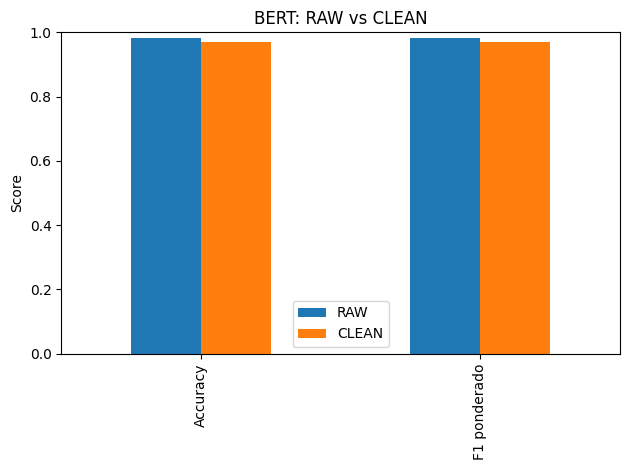

/Users/felipemesa/.pyenv/versions/3.11.11/lib/python3.11/site-packages/transformers/training_args.py:2179: UserWarning: `use_mps_device` is deprecated and will be removed in version 5.0 of ü§ó Transformers. `mps` device will be used by default if available similar to the way `cuda` device is used.Therefore, no action from user is required. 
  warnings.warn(
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:13<00:00,  1.68it/s]



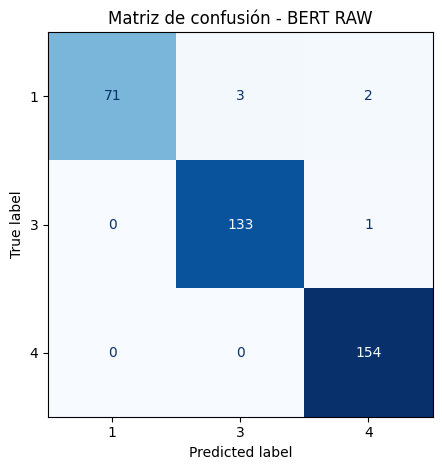

== Reporte de clasificaci√≥n (RAW) ==
              precision    recall  f1-score   support

           1      1.000     0.934     0.966        76
           3      0.978     0.993     0.985       134
           4      0.981     1.000     0.990       154

    accuracy                          0.984       364
   macro avg      0.986     0.976     0.981       364
weighted avg      0.984     0.984     0.983       364



In [68]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

def metric_or_none(metrics: dict, key: str):
    try:
        return float(metrics.get(key, np.nan))
    except Exception:
        return np.nan

# M√©tricas resumidas
acc_raw  = metric_or_none(metrics_raw,  'eval_accuracy')     or metric_or_none(metrics_raw,  'accuracy')
f1w_raw  = metric_or_none(metrics_raw,  'eval_f1_weighted')  or metric_or_none(metrics_raw,  'f1_weighted')
acc_clean= metric_or_none(metrics_clean,'eval_accuracy')     or metric_or_none(metrics_clean,'accuracy')
f1w_clean= metric_or_none(metrics_clean,'eval_f1_weighted')  or metric_or_none(metrics_clean,'f1_weighted')

df_plot = pd.DataFrame(
    {'RAW': [acc_raw, f1w_raw],
     'CLEAN': [acc_clean, f1w_clean]},
    index=['Accuracy', 'F1 ponderado']
)
ax = df_plot.plot(kind='bar')
ax.set_ylabel('Score')
ax.set_title('BERT: RAW vs CLEAN')
ax.set_ylim(0, 1.0)
plt.tight_layout()
plt.show()

# Matriz de confusi√≥n del mejor experimento (seg√∫n F1 ponderado)
score_raw = f1w_raw if np.isfinite(f1w_raw) else -1.0
score_clean = f1w_clean if np.isfinite(f1w_clean) else -1.0
use_raw = score_raw >= score_clean

exp_name = 'bert_raw' if use_raw else 'bert_clean'
test_ds  = hf_test_raw if use_raw else hf_test_clean
exp_label = 'RAW' if use_raw else 'CLEAN'

# Cargar mejor modelo guardado y predecir sobre el conjunto de prueba correspondiente
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, DataCollatorWithPadding

model_dir = f'./hf_models/{exp_name}'

tokenizer_eval = AutoTokenizer.from_pretrained(model_dir)
model_eval = AutoModelForSequenceClassification.from_pretrained(model_dir)
model_eval.to(device)

args_eval = TrainingArguments(
    output_dir='./tmp_eval',
    per_device_eval_batch_size=16,
    report_to=[],
    fp16=False,
    use_mps_device=(str(device) == 'mps'),
)
data_collator_eval = DataCollatorWithPadding(tokenizer=tokenizer_eval)
trainer_eval = Trainer(
    model=model_eval,
    args=args_eval,
    tokenizer=tokenizer_eval,
    data_collator=data_collator_eval,
)

preds = trainer_eval.predict(test_ds)
y_true = np.array(test_ds['label'])
y_pred = preds.predictions.argmax(axis=1)

# Orden y etiquetas legibles (ODS originales)
ods_order = sorted(label_id_map.keys())               # [1,3,4]
label_order = [label_id_map[v] for v in ods_order]    # [0,1,2] seg√∫n mapeo
display_labels = [str(v) for v in ods_order]

ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred,
    labels=label_order,
    display_labels=display_labels,
    cmap='Blues',
    colorbar=False
)
plt.title(f'Matriz de confusi√≥n - BERT {exp_label}')
plt.tight_layout()
plt.show()

print(f'== Reporte de clasificaci√≥n ({exp_label}) ==')
print(classification_report(y_true, y_pred, target_names=display_labels, digits=3))


# Final

|Modelo|Accuracy/Precisi√≥n|F1 macro|Observaciones principales|
|-------------------------|----------|----------|---------------------------|
|**LinearSVC (TF-IDF)**|0.969|0.966|Buen rendimiento, balanceado entre ODS 1, 3 y 4. Mejor C=0.5.|
|**Naive Bayes**|0.970|0.968|Rendimiento muy bueno y estable. Bigramas y Œ±=0.1 fueron clave. ODS1 tiene un recall ligeramente menor al resto al dejar unos falsos negativos. 
|**BERT destilado (Trasnformador de texto) sin preprocesar**|0.986|0.981|Mejor rendimiento, pero el tiempo de entrenamiento es mucho m√°s alto. Tuvo mejores resultados con los datos "crudos" por encima de los limpios/preprocesados debido a que el modelo base fue preentrenado sobre texto natural/crudo.
